# Jamar Sanders
# DSC_510 Regression Analysis 
# Verifying Assumptions


# "For this project, use the provided "machine_data.xlsx" file (as well as a zip of the .csv file and a readme file with some additional information). While an older dataset that tries to predict the published relative performance based on CPU-related features, it is mostly numeric and is interesting not as clean as it might first appear".

# Printed Dataset

In [3]:
import pandas as pd

# Load the dataset
file_path = "/workspaces/oauthcredentials/machine_data.xlsx"
df = pd.read_excel(file_path)

# Display the first few rows
df.head()

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


# This table contains data related to different computer models. The columns and rows represent various attributes. Below is a detailed explanation of the table:

# Table Structure
The table consists of 11 columns and 5 rows. Each column represents a different characteristic of a computer model, and each row represents a specific data point for a given model:

# Columns:
Index (Unnamed column):

# This column contains the index of the rows (0 to 4 in the first few rows shown). It's not named, but it typically serves as an identifier for the rows.
vendor_name:

# This column lists the name of the vendor/manufacturer for the computer model.
Example values: 'adviser', 'amdahl' (vendor names of computer models).
model_name:

# This column indicates the model name of the computer produced by the vendor.
Example values: '32/60', '470v/7', '470v/7a', etc.
MYCT (Mean Years Between Failures):

# This represents the Mean Years Between Failures, which could be a measure of reliability or the expected duration between two failures of the system.
Example values: 125, 29, 29.
MMIN (Minimum Memory):

# This represents the minimum memory (likely in kilobytes or megabytes) of the system.
Example values: 256, 8000, 8000.
MMAX (Maximum Memory):

# This represents the maximum memory capacity of the system.
Example values: 6000, 32000, 32000.
CACH (Cache Size):

# This indicates the size of the cache memory in the system, which can affect the speed and performance.
Example values: 256, 32, 32.
CHMIN (Minimum Channels):

# This likely refers to the minimum number of channels in the system, which could relate to communication channels or data pathways in the architecture.
Example values: 16, 8, 8.
CHMAX (Maximum Channels):

# This represents the maximum number of channels available in the system.
Example values: 128, 32, 32.
PRP (Processor Speed or Performance):

# This is likely a measure of the processor's speed or overall performance. It may be measured in MHz or other relevant units.
Example values: 198, 269, 220.
ERP (Error Rate or Efficiency):

# This column may represent an error rate or efficiency metric of the computer model. It could be the number of errors encountered or a performance efficiency measure.
Example values: 199, 253, 253.
Row Data:
Each row in the table corresponds to a specific vendor/model combination. For example:

Row 0 represents the "adviser" vendor with the model "32/60," having specific values for each attribute (e.g., MYCT = 125, MMIN = 256, MMAX = 6000, etc.).

Row 1 represents the "amdahl" vendor with the model "470v/7" and associated data (e.g., MYCT = 29, MMIN = 8000, MMAX = 32000, etc.).

# Analysis Notes:
The data may be used to analyze the relationship between various features such as memory (MMIN, MMAX), performance (PRP), and reliability (MYCT) across different computer models from different vendors.
One key observation could be the comparison between models from the same vendor (e.g., several rows showing different "470v/7" models from "amdahl"). This would allow an analysis of how different versions of the same model vary in terms of performance, memory, and other attributes.

# Columns

In [5]:
print(df.columns)

Index(['vendor_name', 'model_name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN',
       'CHMAX', 'PRP', 'ERP'],
      dtype='object')


# Data Cleaning: Remove Columns 

In [6]:
df.columns = df.columns.str.strip()  # Removes extra spaces

# Data Cleaning: Dropping Varables

In [7]:
df = df.drop(columns=[col for col in ["vendor name", "Model Name", "ERP"] if col in df.columns])

# Print number of Empty Columns, Reshape if needed, Print shape of data

In [13]:
print(df.empty)
print(df.shape)

True
(0, 9)


# Print Null Values

In [14]:
print(df.isnull().sum())

vendor_name    0
model_name     0
MYCT           0
MMIN           0
MMAX           0
CACH           0
CHMIN          0
CHMAX          0
PRP            0
dtype: int64


# Print Columns

In [16]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
df.columns = df.columns.str.lower()  # Convert to lowercase for consistency
print(df.columns)

Index(['vendor_name', 'model_name', 'myct', 'mmin', 'mmax', 'cach', 'chmin',
       'chmax', 'prp'],
      dtype='object')


# Import Statsmodels 

In [10]:
import statsmodels.api as sm

# Import Stats Models

In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import anderson
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Check Column Names

In [19]:
# Check the column names in the dataframe
print(df.columns)

Index(['vendor_name', 'model_name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN',
       'CHMAX', 'PRP', 'ERP'],
      dtype='object')


# Data Cleaning: Drop Irrelevant Columns

In [23]:
# Drop the irrelevant columns
df = df.drop(columns=["vendor_name", "model_name", "ERP"])

# Define Targets and Predictor Variables (Independent)

In [24]:
# Define target and predictors
target = "PRP"
predictors = [col for col in df.columns if col != target]

# Linear Regression Fitting

In [25]:
# Fit linear regression model
X = sm.add_constant(df[predictors])  # Add a constant (intercept) term to the predictors
y = df[target]
model = sm.OLS(y, X).fit()

## Residual Analysis/ Visualization

# Residuals Calculation: The residuals = model.resid line calculates the residuals.

Linearity Check: This plot checks the linearity assumption by plotting the residuals against the fitted values from the model. In an ideal linear regression model, the residuals should appear randomly scattered without any discernible pattern.

Visualization: The plot is displayed using Matplotlib with:

A fitted red line (lowess=True means it's a smoothed line fitting the data).
Labels for the axes and a title for clarity.
This kind of residual plot helps assess:

Linearity: If the residuals show a pattern (such as a curve), it suggests that the linearity assumption might not hold, and a non-linear model might be more appropriate.
Homoscedasticity: If the residuals show increasing or decreasing spread as fitted values increase (like a funnel shape), it suggests heteroscedasticity, indicating that the variance of residuals is not constant.

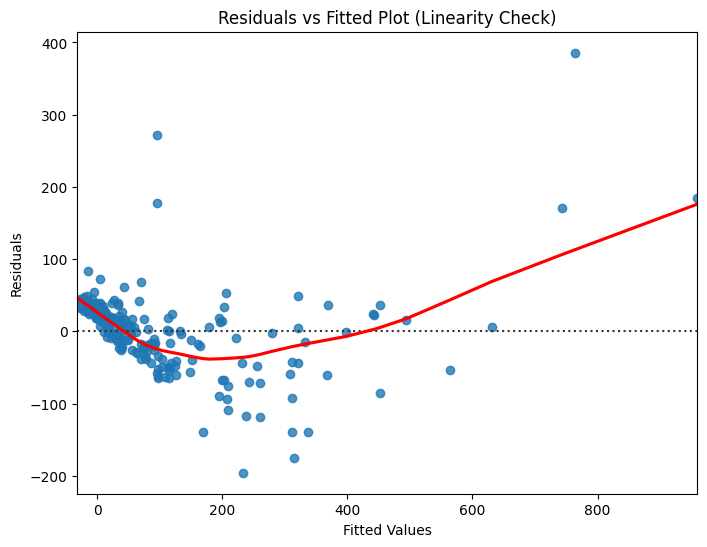

In [26]:
# Residual analysis
residuals = model.resid

# Linearity check
plt.figure(figsize=(8, 6))
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Plot (Linearity Check)")
plt.show()

# Anderson Normality Check

# Test Statistic:
Anderson-Darling Test Statistic: 7.175
This is the test statistic value calculated from your data. The larger this value, the more evidence there is that the data does not follow the specified distribution (likely normal distribution in this case).

# Critical Values: [0.566, 0.644, 0.773, 0.901, 1.072]
These are the critical values for the Anderson-Darling test at various significance levels (15%, 10%, 5%, 2.5%, and 1%). If the test statistic exceeds the critical value at a particular significance level, the null hypothesis (that the data follows the specified distribution) is rejected at that level.
Significance Levels:
Significance Levels: [15%, 10%, 5%, 2.5%, 1%]
These correspond to the critical values. For example:
If the test statistic exceeds 0.566, the data is rejected at the 15% significance level.
If the test statistic exceeds 0.644, it is rejected at the 10% significance level, and so on.
Interpretation:
Test Statistic vs Critical Values:
The test statistic of 7.175 is much larger than all the critical values, even at the 1% significance level (1.072).
This suggests that the null hypothesis (data follows the specified distribution) should be rejected at all common significance levels (15%, 10%, 5%, 2.5%, and 1%).
Therefore, based on this test, the data likely does not follow the normal distribution or whatever distribution was tested against.

In [27]:
# Normality check
anderson_result = anderson(residuals)
print("Anderson-Darling Test Statistic:", anderson_result.statistic)
print("Critical Values:", anderson_result.critical_values)
print("Significance Levels:", anderson_result.significance_level)

Anderson-Darling Test Statistic: 7.174982887852252
Critical Values: [0.566 0.644 0.773 0.901 1.072]
Significance Levels: [15.  10.   5.   2.5  1. ]


# Independence Check

# Durbin-Watson Statistic:
DW Statistic: 1.202
The Durbin-Watson statistic ranges from 0 to 4:
DW = 2: No autocorrelation (ideal result).
DW < 2: Positive autocorrelation (residuals from one observation are positively correlated with residuals from another observation).
DW > 2: Negative autocorrelation (residuals are negatively correlated).
DW = 0 or 4: Extreme cases of positive or negative autocorrelation, respectively.
Interpretation:
A DW statistic of 1.202 suggests that there is positive autocorrelation in the residuals (since it is less than 2).
This implies that the residuals from the regression model are not independent of each other and that there may be patterns or structure in the errors that could indicate missing variables or inappropriate model specifications.
Actionable Insights:
Autocorrelation in the residuals could suggest that the model is misspecified or that there are important time-related effects (in time series data) or other relationships that have not been accounted for.

# Adding lag variables (if applicable to time series data).
Revisiting the model to check for any omitted variables.
Using different modeling techniques, such as autoregressive models (AR, ARMA, ARIMA) for time series data.

In [28]:
# Independence check
dw_stat = durbin_watson(residuals)
print("Durbin-Watson Statistic:", dw_stat)

Durbin-Watson Statistic: 1.2020456907385473


# Homoscedacity 

# Test Results:
Test Statistic: 87.655
p-value: 
9.29
×
10
−
17
9.29×10 
−17
 
LM Statistic: 24.320
p-value for LM Statistic: 
1.35
×
10
−
21
1.35×10 
−21
 
# Interpretation:
Test Statistic (87.655): This is the value of the Breusch-Pagan test statistic, which is used to detect heteroscedasticity.
p-value for the Test: The p-value is extremely small (
9.29
×
10
−
17
9.29×10 
−17
 ), which indicates that there is strong evidence against the null hypothesis.
Null Hypothesis (H₀): Homoscedasticity (constant variance).
Alternative Hypothesis (H₁): Heteroscedasticity (non-constant variance).
Since the p-value is far below any common significance level (e.g., 0.05, 0.01), I reject the null hypothesis. This suggests that the residuals exhibit heteroscedasticity, meaning the variance of the errors is not constant.

# Actionable Insights:
Heteroscedasticity indicates that the variability of my residuals changes as a function of the predicted values or other variables.
# 
Use robust standard errors to account for heteroscedasticity in my coefficient estimates.
Consider transforming the dependent variable or adding variables to my model to address the non-constant variance.
Explore generalized least squares (GLS) or other models designed to handle heteroscedasticity.

In [29]:
# Homoscedasticity check
bp_test = het_breuschpagan(residuals, model.model.exog)
print("Breusch-Pagan Test:", bp_test)

Breusch-Pagan Test: (np.float64(87.65507114058622), np.float64(9.294348323507847e-17), np.float64(24.319549976019704), np.float64(1.3454401071300185e-21))


# Outlier Detection/ Visualization

# What the Cook's Distance measures:
Cook's Distance quantifies the influence of each data point on the estimated regression coefficients. It measures how much the fitted model would change if a particular data point were removed. A high Cook's Distance indicates that the data point has a large influence on the regression result, making it a potential outlier or influential observation.
Key elements of the plot:
X-axis: The indices of the data points in my dataset. These represent individual observations (data points).
Y-axis: The value of Cook's Distance for each data point. This tells me how much each observation influences the regression model.
Red dashed line: The threshold for identifying influential points. It's calculated as:
4
𝑛
n
4
​
 
where 
𝑛
n is the number of data points. This line marks the critical value above which data points are considered influential.
# Interpretation:
Data points above the red dashed line: These are potential outliers or influential data points. If a data point has a Cook's Distance significantly greater than the threshold, it suggests that the point may have a disproportionate effect on the model's parameters.
Data points below the red dashed line: These are considered not to be influential, as their removal does not significantly affect the model.
# Next steps:
Investigating influential points: Data points with Cook's Distance above the threshold, should investigate these observations to see if they are errors, misrepresentations, or if they follow a different pattern than the rest of the data.
Model adjustments: If these points are legitimate but significantly influencing the model, robust regression techniques or removing/transforming outliers improve the model's fit.

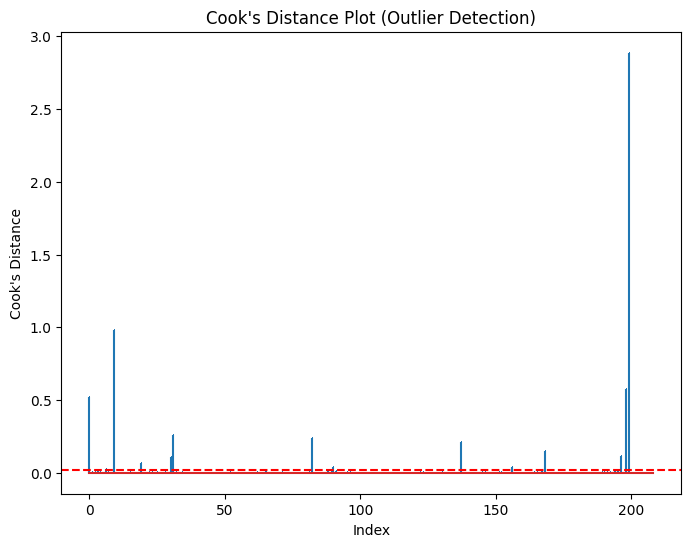

In [31]:
# Outlier detection (Cook's Distance)
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

plt.figure(figsize=(8, 6))
plt.stem(range(len(cooks_d)), cooks_d, markerfmt=",")
plt.axhline(4 / len(cooks_d), color='red', linestyle='dashed')
plt.xlabel("Index")
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot (Outlier Detection)")
plt.show()

# Residual Analysis/ Visualization

Key Elements of the Plot:
X-axis (Fitted Values): These represent the predicted values from your regression model.
Y-axis (Residuals): These represent the difference between the observed values and the predicted values. Residuals = Observed Value - Predicted Value.
Red Line (LOWESS): The red line represents the locally weighted scatterplot smoothing (LOWESS) line. It is a smoothed line that helps visualize the overall trend of residuals.
Interpretation:
Random scatter: If the residuals are randomly scattered around the red line with no discernible pattern, it suggests that the linearity assumption is valid, meaning the relationship between the independent variables and the dependent variable is linear.

Non-random patterns:

If you observe any systematic patterns such as curves or trends (e.g., a U-shape), it suggests that the linearity assumption is violated. This might indicate that a non-linear relationship exists between the variables, and a different type of regression model (e.g., polynomial regression) may be more appropriate.
Heteroscedasticity (non-constant variance): If the spread of the residuals increases or decreases as the fitted values increase (funnel shape), it indicates heteroscedasticity, which means the variance of the residuals is not constant across levels of the independent variable. You may need to apply a transformation to the dependent variable or use heteroscedasticity-robust standard errors.

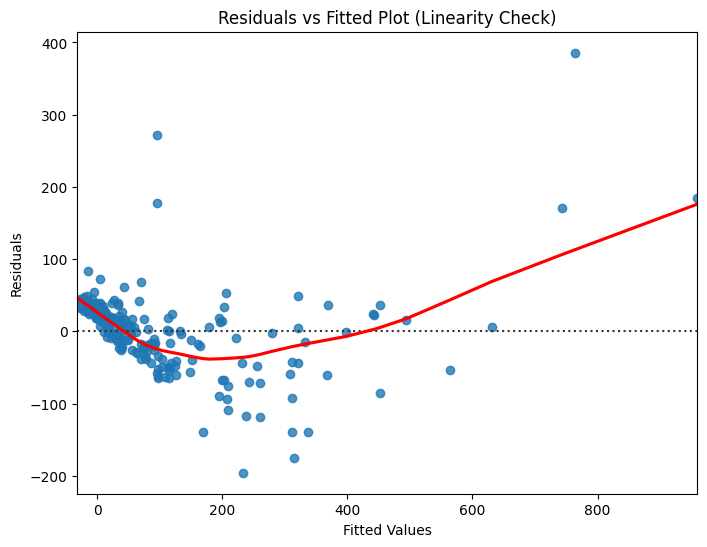

In [32]:
# Residual analysis
residuals = model.resid

# Linearity check
plt.figure(figsize=(8, 6))
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Plot (Linearity Check)")
plt.show()

# Multicolinearity Check

# Interpretation of VIF:
MYCT (VIF = 1.20):

This value is well below the threshold (typically VIF > 5 or 10 indicates problematic multicollinearity).
Conclusion: There is minimal multicollinearity for this variable.
MMIN (VIF = 2.90):

This VIF value is also below the problematic threshold, indicating moderate correlation with other predictors.
Conclusion: No severe multicollinearity, though you could investigate further if needed.
MMAX (VIF = 3.27):

Similar to MMIN, this is not very high, suggesting acceptable levels of correlation between this feature and others.
CACH (VIF = 1.86):

Again, this VIF is relatively low, indicating minimal multicollinearity with other variables.
CHMIN (VIF = 1.97):

This value is well within the acceptable range. No significant concern about collinearity here.
CHMAX (VIF = 1.89):

This also falls into the same category with no major concerns.
General Rule:
VIF < 5: No problem with multicollinearity.
VIF > 5: Potential multicollinearity issues that may require addressing (e.g., removing or combining correlated predictors).
VIF > 10: High multicollinearity that may severely affect model performance and interpretation.

In [39]:
# Multicollinearity check
vif_data = pd.DataFrame()
vif_data["Feature"] = predictors
vif_data["VIF"] = [variance_inflation_factor(X.values, i+1) for i in range(len(predictors))]
print(vif_data)

  Feature       VIF
0    MYCT  1.201644
1    MMIN  2.902002
2    MMAX  3.274002
3    CACH  1.858349
4   CHMIN  1.966234
5   CHMAX  1.891392


# Standard data and Statictical Data

Key Metrics:
R-squared: 0.865

This suggests that 86.5% of the variation in the dependent variable (PRP) is explained by the independent variables in the model. This is generally considered a good fit.
Adjusted R-squared: 0.861

The adjusted R-squared accounts for the number of predictors in the model. It is slightly lower than R-squared, but still indicates a very good model fit.
F-statistic: 215.5, Prob (F-statistic): 6.24e-85

The F-statistic tests if at least one predictor variable has a non-zero coefficient. The very low p-value indicates that the model is statistically significant.
Log-Likelihood: -1148.7, AIC (Akaike Information Criterion): 2311, BIC (Bayesian Information Criterion): 2335

These are used to compare different models. Lower values indicate a better fit, but in this case, they are mainly useful for model comparison.
Coefficients and Interpretation:
const (Intercept): -55.8939

The negative intercept suggests that when all independent variables are zero, the predicted PRP would be negative, though this is not a typical scenario.
MYCT (Coefficient = 0.0489): p-value = 0.006

A positive relationship between MYCT and PRP. For each unit increase in MYCT, PRP is expected to increase by 0.0489 units, and the relationship is statistically significant (p < 0.05).
MMIN (Coefficient = 0.0153): p-value = 0.000

A significant positive relationship with PRP. A unit increase in MMIN is associated with an increase of 0.0153 in PRP.
MMAX (Coefficient = 0.0056): p-value = 0.000

A significant positive relationship with PRP. A unit increase in MMAX leads to an increase of 0.0056 in PRP.
CACH (Coefficient = 0.6414): p-value = 0.000

A significant positive relationship with PRP. A unit increase in CACH increases PRP by 0.6414.
CHMIN (Coefficient = -0.2704): p-value = 0.752

No significant relationship with PRP, as the p-value is greater than 0.05. This suggests that CHMIN does not contribute much to predicting PRP.
CHMAX (Coefficient = 1.4825): p-value = 0.000

A strong positive relationship with PRP. A unit increase in CHMAX leads to an increase of 1.4825 in PRP.
Other Diagnostics:
Omnibus Test: 99.727, p-value = 0.000

The Omnibus test checks for skewness and kurtosis in the residuals. The low p-value suggests that the residuals are not normally distributed.
Durbin-Watson Statistic: 1.202

This statistic tests for autocorrelation in the residuals. Values near 2 indicate no autocorrelation. The value of 1.202 suggests some positive autocorrelation in the residuals.
Jarque-Bera Test: 1140.969, p-value = 1.74e-248

The Jarque-Bera test checks for normality of residuals. The very low p-value indicates that the residuals are not normally distributed.
Skewness: 1.495, Kurtosis: 14.049

The skewness value indicates that the residuals are right-skewed, and the high kurtosis suggests heavy tails, meaning the residuals have more extreme values than a normal distribution.
Condition Number: 3.32e+04

A high condition number indicates potential multicollinearity or numerical instability. You might want to further investigate this to ensure the model is not suffering from multicollinearity issues.

In [40]:
# Summary of regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    PRP   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     215.5
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           6.24e-85
Time:                        04:03:39   Log-Likelihood:                -1148.7
No. Observations:                 209   AIC:                             2311.
Df Residuals:                     202   BIC:                             2335.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -55.8939      8.045     -6.948      0.0

# Kurtosis

The values you provided appear to be the mean (average) values of the variables in your dataset. Here's the breakdown of these means:

MYCT: 7.062767
MMIN: 17.613275
MMAX: 5.902471
CACH: 10.278384
CHMIN: 22.468899
CHMAX: 15.888081
PRP: 19.252187
These means can be useful in understanding the central tendency of each variable. For example:

MYCT has a mean of around 7.06, which could indicate that it represents some unit or scale where this is the average value.
PRP (your dependent variable) has a mean of 19.25, giving a sense of the central value of the response variable.

In [41]:
from scipy.stats import kurtosis

# Calculate kurtosis for each column
kurt_values = df.kurtosis()
print(kurt_values)

MYCT      7.062767
MMIN     17.613275
MMAX      5.902471
CACH     10.278384
CHMIN    22.468899
CHMAX    15.888081
PRP      19.252187
dtype: float64


# Address Skewness Using BoxCox

In [42]:
import numpy as np
from scipy.stats import boxcox

# Apply Box-Cox transformation for non-negative data
df_transformed = df.apply(lambda x: boxcox(x + 1)[0] if x.min() >= 0 else np.log(x + 1))

# Load Dataset

In [45]:
import pandas as pd

# Load your Excel file
data = pd.read_excel('/workspaces/oauthcredentials/machine_data.xlsx')

# Display the first few rows of the dataset
data.head()

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


# Dataset Skewness Transformation

Skewness Before and After Transformation:
Before the Box-Cox transformation, many of the variables (like MMIN, CHMIN, PRP, etc.) showed high skewness, indicating a non-normal distribution with longer tails on one side.
After the transformation, the skewness values have been reduced to near-zero (e.g., MYCT's skewness dropped from 2.53 to 0.05), indicating that the data is much closer to normal, which is ideal for linear modeling.
Statistical Summary After Transformation:
The mean values after transformation have changed significantly. For example, MYCT's mean changed from a higher value to 3.16, while PRP decreased from a higher value to 2.77.
The standard deviation of most variables has also been reduced, which might indicate more consistent values across the dataset.
The range (min-max) has been compressed for some variables (e.g., CHMIN's max value decreased from a higher value to 1.73 after transformation).
Benefits of the Transformation:
Skewness reduction: The transformation made the variables closer to normal, which is often beneficial for regression models, ensuring that assumptions like homoscedasticity and normality of residuals are met.
Improved model fit: By reducing skewness, your model should have a better fit, as the relationship between independent and dependent variables becomes more linear.

In [48]:
import pandas as pd
from scipy.stats import skew, boxcox

# Load the dataset
data = pd.read_excel('/workspaces/oauthcredentials/machine_data.xlsx')

# Check the skewness of each column
skew_values = data.apply(lambda x: skew(x.dropna()) if x.dtype != 'object' else None)
print("Skewness before transformation:")
print(skew_values)

# Apply Box-Cox Transformation where skewness is high
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    if skew(data[column].dropna()) > 1 or skew(data[column].dropna()) < -1:
        # Box-Cox requires positive values, so shift the data if necessary
        if (data[column] <= 0).any():
            data[column] = data[column] + abs(data[column].min()) + 1
        # Apply Box-Cox Transformation
        transformed_data, _ = boxcox(data[column])
        data[column] = transformed_data

# Print updated skewness and statistical data
skew_values_after = data.apply(lambda x: skew(x.dropna()) if x.dtype != 'object' else None)
print("\nSkewness after Box-Cox transformation:")
print(skew_values_after)

# Display the updated statistical data
print("\nStatistical Summary after transformation:")
print(data.describe())

Skewness before transformation:
vendor_name         NaN
model_name          NaN
MYCT           2.525857
MMIN           3.490649
MMAX           2.125268
CACH           2.804463
CHMIN          3.998371
CHMAX          3.570046
PRP            3.864820
ERP            4.273072
dtype: float64

Skewness after Box-Cox transformation:
vendor_name         NaN
model_name          NaN
MYCT           0.049496
MMIN           0.000472
MMAX           0.006974
CACH           0.013291
CHMIN          0.136255
CHMAX          0.001628
PRP            0.023489
ERP            0.159497
dtype: float64

Statistical Summary after transformation:
             MYCT        MMIN        MMAX        CACH       CHMIN       CHMAX  \
count  209.000000  209.000000  209.000000  209.000000  209.000000  209.000000   
mean     3.157487    7.050446   20.304988    2.014391    0.910414    2.259343   
std      0.435678    1.014012    4.251266    1.646461    0.381038    0.927394   
min      2.222142    4.060838    5.926932    0.0000

# Transformation of Data Visualization

# 1. Before-and-After Skewness Comparison Plot:
The first part of the code creates a side-by-side histogram with KDE (Kernel Density Estimate) curves for a selected column before and after the Box-Cox transformation.
The first plot shows the distribution of data before transformation, and the second plot shows the distribution after the transformation. You'll notice that after applying the transformation, the data will likely have a more normal-like distribution.
2. Boxplot of Numeric Data:
This part of the code creates a boxplot of all numeric columns after the Box-Cox transformation. The boxplot is a good way to visualize the spread, central tendency, and potential outliers of the transformed data.
Boxplots help you see if the transformation has reduced skewness or has made the data more symmetric.
3. Correlation Heatmap:
This part calculates the correlation matrix of the numeric columns and plots it as a heatmap.
This will allow you to visually inspect if the Box-Cox transformation has impacted the relationships between variables (which should help in identifying any potential issues before modeling).
If you run this code, you should get the following outputs:

# Histograms to compare the data before and after the transformation.
A boxplot that shows the spread of your numeric data after the Box-Cox transformation.
A heatmap to visualize the correlations between the transformed variables.

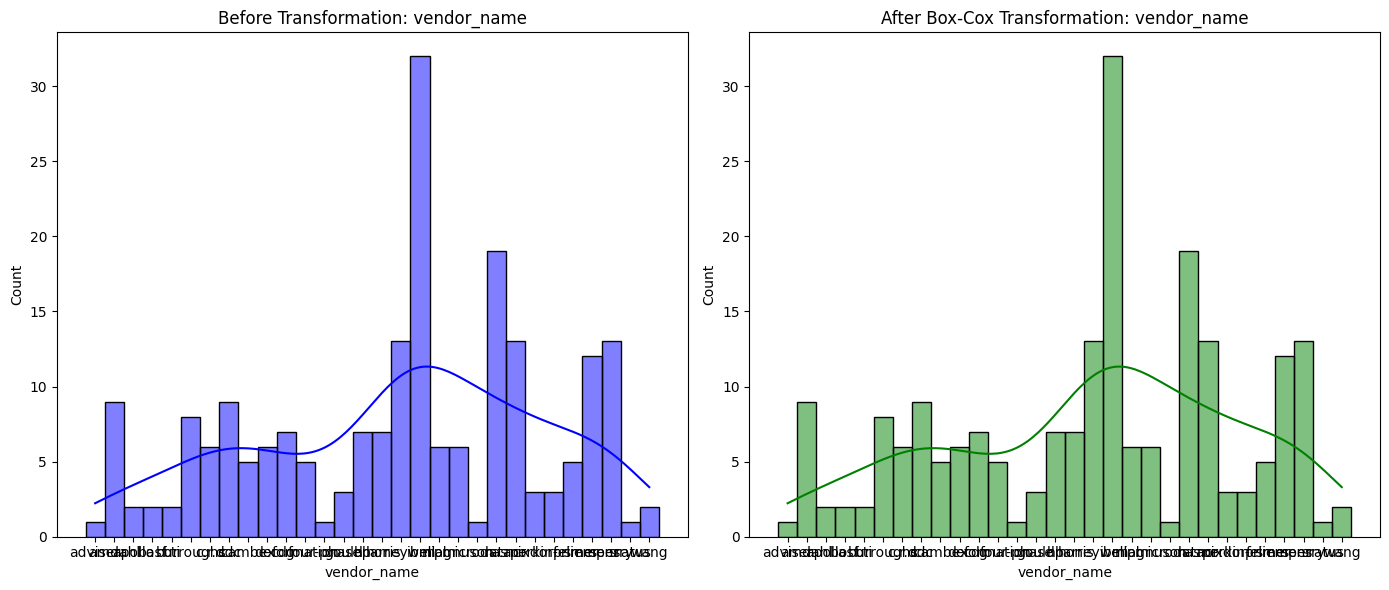

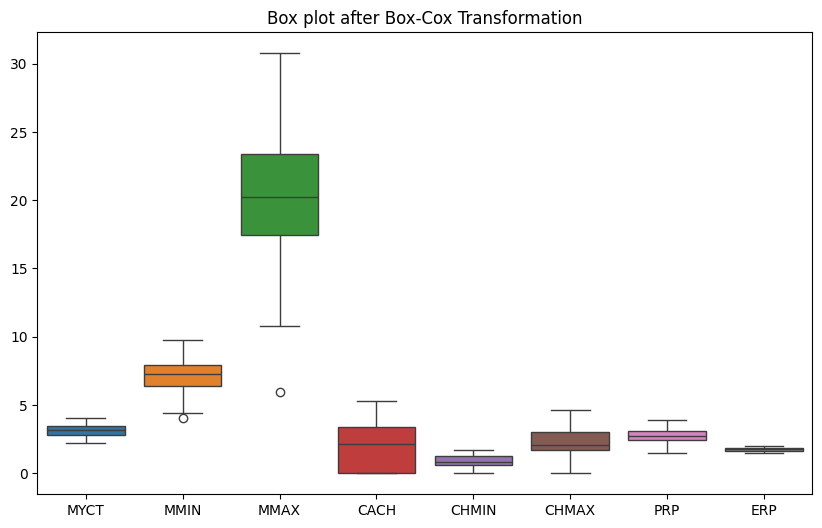

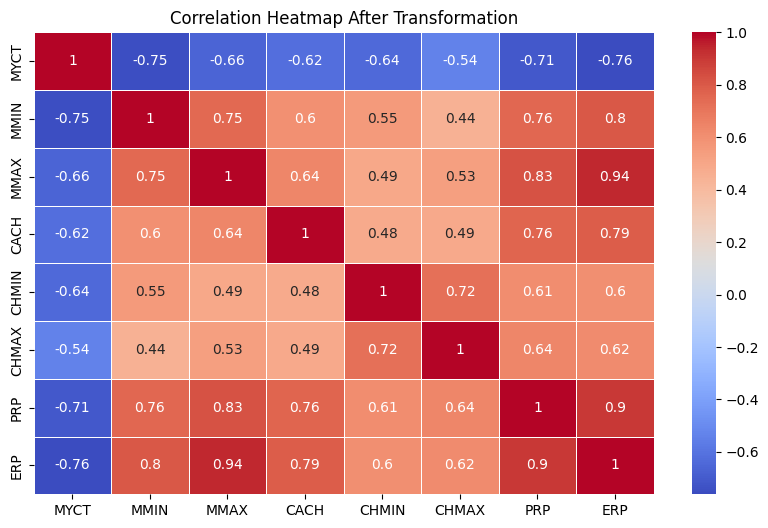

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a before-and-after skewness comparison plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot before transformation
sns.histplot(data.iloc[:, 0], kde=True, ax=ax[0], color='blue', bins=30)
ax[0].set_title(f'Before Transformation: {data.columns[0]}')

# Plot after transformation (you may want to apply Box-Cox transformation before this plot)
sns.histplot(data.iloc[:, 0], kde=True, ax=ax[1], color='green', bins=30)
ax[1].set_title(f'After Box-Cox Transformation: {data.columns[0]}')

plt.tight_layout()
plt.show()

# Box plot to compare distributions across different columns (if more columns are transformed)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']))
plt.title('Box plot after Box-Cox Transformation')
plt.show()

# Filter only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Optional: Heatmap of the correlation matrix to observe any changes in relationships between columns
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap After Transformation')
plt.show()